In [20]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pickle as cPickle
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, matthews_corrcoef, accuracy_score,roc_auc_score
import sklearn.metrics as metrics
from keras import models

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
path_test = "/content/drive/MyDrive/DP_OTG/data/"
path_model = "/content/drive/MyDrive/DP_OTG/Result/"
path_result = "/content/drive/MyDrive/DP_OTG/Result/"


In [26]:
import pandas as pd
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical
# Tạo từ điển 1-gram
def Dic_1_gram():
    AA_list_sort = ['G','A','V','L','I','M','P','F','W','S','T','N','Q','Y','C','K','R','H','D','E','X']
    return {aa: idx + 1 for idx, aa in enumerate(AA_list_sort)}

# Tạo k-mer từ chuỗi protein với kích thước k
def ProSentence(pro, K):
    return " ".join([pro[i: i + K] for i in range(len(pro) - K + 1)])

# Tham số
k = 1  # 1-gram
word_index1 = Dic_1_gram()
vocab_size = len(word_index1)

# Preprocessing dữ liệu kiểm tra và chuyển đổi chuỗi thành chỉ số
df_test = pd.read_csv(path_test+"Imbalanced_Independent.csv", delimiter=',')

# Tạo k-mer cho mỗi chuỗi protein
df_test['k_mer'] = df_test['Sequence'].apply(lambda x: ProSentence(x, k))

# Chuyển đổi k-mer thành chỉ số
test_sequences = [
    [word_index1[aa] for aa in sentence.split()] for sentence in df_test['k_mer']
]

# Padding dữ liệu
MAX_SEQUENCE_LENGTH = len(df_test['k_mer'].iloc[0].split())  # Dùng độ dài của câu đầu tiên
Xtest = pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH)

# Nhãn kiểm tra
ytest = df_test['Label'].values


In [27]:
from keras import models
model_CNN3 = models.load_model(path_model +"CNN_3.h5")
y_prob_CNN3 = model_CNN3.predict(Xtest)
y_pred = model_CNN3.predict(Xtest)
y_pred = (y_pred[:, 1] > 0.5).astype(int)
y_true = np.array(ytest)

cm = confusion_matrix(y_true, y_pred)
mcc = matthews_corrcoef(y_true, y_pred)
acc = accuracy_score(y_true, y_pred)

sn = cm[1][1]/(cm[1][1]+cm[1][0])
sp = cm[0][0]/(cm[0][0]+cm[0][1])
print('ACC, MCC, SN, SP:',acc, mcc,sn,sp)
print(cm)
#pd.DataFrame(y_prob_KD1[:,1], columns=['KD1_predictions_1gram']).to_csv(path +'prediction_1gram.csv')

37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
ACC, MCC, SN, SP: 0.8431372549019608 0.525294525399401 0.7582417582417582 0.858728557013118
[[851 140]
 [ 44 138]]


In [28]:
from keras import models
model_CNN5 = models.load_model(path_model +"CNN_5.h5")
y_prob_CNN5 = model_CNN5.predict(Xtest)
y_pred = model_CNN5.predict(Xtest)

y_pred = (y_pred[:, 1] > 0.5).astype(int)
y_true = np.array(ytest)

cm = confusion_matrix(y_true, y_pred)
mcc = matthews_corrcoef(y_true, y_pred)
acc = accuracy_score(y_true, y_pred)

sn = cm[1][1]/(cm[1][1]+cm[1][0])
sp = cm[0][0]/(cm[0][0]+cm[0][1])
print('ACC, MCC, SN, SP:',acc, mcc,sn,sp)
print(cm)
#pd.DataFrame(y_prob_KD1[:,1], columns=['KD1_predictions_1gram']).to_csv(path +'prediction_1gram.csv')

37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
ACC, MCC, SN, SP: 0.8303495311167945 0.5423290301902529 0.8406593406593407 0.8284561049445005
[[821 170]
 [ 29 153]]


In [29]:
from keras import models
model_CNN7 = models.load_model(path_model +"CNN_7.h5")
y_prob_CNN7 = model_CNN7.predict(Xtest)
y_pred = model_CNN7.predict(Xtest)

y_pred = (y_pred[:, 1] > 0.5).astype(int)
y_true = np.array(ytest)

cm = confusion_matrix(y_true, y_pred)
mcc = matthews_corrcoef(y_true, y_pred)
acc = accuracy_score(y_true, y_pred)

sn = cm[1][1]/(cm[1][1]+cm[1][0])
sp = cm[0][0]/(cm[0][0]+cm[0][1])
print('ACC, MCC, SN, SP:',acc, mcc,sn,sp)
print(cm)
#pd.DataFrame(y_prob_KD1[:,1], columns=['KD1_predictions_1gram']).to_csv(path +'prediction_1gram.csv')

37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
ACC, MCC, SN, SP: 0.8508098891730606 0.5465302521076821 0.7747252747252747 0.8647830474268415
[[857 134]
 [ 41 141]]


In [30]:
from keras import models
model_CNN35 = models.load_model(path_model +"CNNs35.h5")
y_prob_CNN35 = model_CNN35.predict(Xtest)
y_pred = model_CNN35.predict(Xtest)

y_pred = (y_pred[:, 1] > 0.5).astype(int)
y_true = np.array(ytest)

cm = confusion_matrix(y_true, y_pred)
mcc = matthews_corrcoef(y_true, y_pred)
acc = accuracy_score(y_true, y_pred)

sn = cm[1][1]/(cm[1][1]+cm[1][0])
sp = cm[0][0]/(cm[0][0]+cm[0][1])
print('ACC, MCC, SN, SP:',acc, mcc,sn,sp)
print(cm)
#pd.DataFrame(y_prob_KD1[:,1], columns=['KD1_predictions_1gram']).to_csv(path +'prediction_1gram.csv')

37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
ACC, MCC, SN, SP: 0.8090366581415175 0.4913801617647811 0.8021978021978022 0.8102926337033299
[[803 188]
 [ 36 146]]


In [31]:
from keras import models
model_CNN37 = models.load_model(path_model +"CNNs37.h5")
y_prob_CNN37 = model_CNN37.predict(Xtest)
y_pred = model_CNN37.predict(Xtest)

y_pred = (y_pred[:, 1] > 0.5).astype(int)
y_true = np.array(ytest)

cm = confusion_matrix(y_true, y_pred)
mcc = matthews_corrcoef(y_true, y_pred)
acc = accuracy_score(y_true, y_pred)

sn = cm[1][1]/(cm[1][1]+cm[1][0])
sp = cm[0][0]/(cm[0][0]+cm[0][1])
print('ACC, MCC, SN, SP:',acc, mcc,sn,sp)
print(cm)
#pd.DataFrame(y_prob_KD1[:,1], columns=['KD1_predictions_1gram']).to_csv(path +'prediction_1gram.csv')

37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
ACC, MCC, SN, SP: 0.8653026427962489 0.5832801987050914 0.7967032967032966 0.8779011099899092
[[870 121]
 [ 37 145]]


In [32]:
from keras import models
model_CNN57 = models.load_model(path_model +"CNNs57.h5")
y_prob_CNN57 = model_CNN57.predict(Xtest)
y_pred = model_CNN57.predict(Xtest)

y_pred = (y_pred[:, 1] > 0.5).astype(int)
y_true = np.array(ytest)

cm = confusion_matrix(y_true, y_pred)
mcc = matthews_corrcoef(y_true, y_pred)
acc = accuracy_score(y_true, y_pred)

sn = cm[1][1]/(cm[1][1]+cm[1][0])
sp = cm[0][0]/(cm[0][0]+cm[0][1])
print('ACC, MCC, SN, SP:',acc, mcc,sn,sp)
print(cm)
#pd.DataFrame(y_prob_KD1[:,1], columns=['KD1_predictions_1gram']).to_csv(path +'prediction_1gram.csv')

37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
ACC, MCC, SN, SP: 0.8738277919863597 0.5979168493900742 0.7912087912087912 0.8890010090817356
[[881 110]
 [ 38 144]]


In [33]:
from keras import models
model_CNN357 = models.load_model(path_model +"CNNs357.h5")
y_prob_CNN357 = model_CNN357.predict(Xtest)
y_pred = model_CNN357.predict(Xtest)
y_pred = (y_pred[:, 1] > 0.5).astype(int)
y_true = np.array(ytest)

cm = confusion_matrix(y_true, y_pred)
mcc = matthews_corrcoef(y_true, y_pred)
acc = accuracy_score(y_true, y_pred)

sn = cm[1][1]/(cm[1][1]+cm[1][0])
sp = cm[0][0]/(cm[0][0]+cm[0][1])
print('ACC, MCC, SN, SP:',acc, mcc,sn,sp)
print(cm)
#pd.DataFrame(y_prob_KD1[:,1], columns=['KD1_predictions_1gram']).to_csv(path +'prediction_1gram.csv')

37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
ACC, MCC, SN, SP: 0.8405797101449275 0.5283950863148871 0.7747252747252747 0.8526740665993946
[[845 146]
 [ 41 141]]


In [34]:
from keras import models
model_Bi_LSTM = models.load_model(path_model +"Bi-LSTM.h5")
y_prob_Bi_LSTM = model_Bi_LSTM.predict(Xtest)
y_pred = model_Bi_LSTM.predict(Xtest)
y_pred = (y_pred[:, 1] > 0.5).astype(int)
y_true = np.array(ytest)

cm = confusion_matrix(y_true, y_pred)
mcc = matthews_corrcoef(y_true, y_pred)
acc = accuracy_score(y_true, y_pred)

sn = cm[1][1]/(cm[1][1]+cm[1][0])
sp = cm[0][0]/(cm[0][0]+cm[0][1])
print('ACC, MCC, SN, SP:',acc, mcc,sn,sp)
print(cm)
#pd.DataFrame(y_prob_KD1[:,1], columns=['KD1_predictions_1gram']).to_csv(path +'prediction_1gram.csv')

37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
ACC, MCC, SN, SP: 0.8312020460358056 0.5436699376508944 0.8406593406593407 0.829465186680121
[[822 169]
 [ 29 153]]


In [35]:
from keras import models
model_CNN357_BI_LSTM = models.load_model(path_model +"DP_OTG.h5")
y_prob_CNN357_BI_LSTM = model_CNN357_BI_LSTM.predict(Xtest)
y_pred = model_CNN357_BI_LSTM.predict(Xtest)
y_pred = (y_pred[:, 1] > 0.5).astype(int)
y_true = np.array(ytest)

cm = confusion_matrix(y_true, y_pred)
mcc = matthews_corrcoef(y_true, y_pred)
acc = accuracy_score(y_true, y_pred)

sn = cm[1][1]/(cm[1][1]+cm[1][0])
sp = cm[0][0]/(cm[0][0]+cm[0][1])
print('ACC, MCC, SN, SP:',acc, mcc,sn,sp)
print(cm)

37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
ACC, MCC, SN, SP: 0.8934356351236147 0.6605873107870847 0.8461538461538461 0.9021190716448032
[[894  97]
 [ 28 154]]


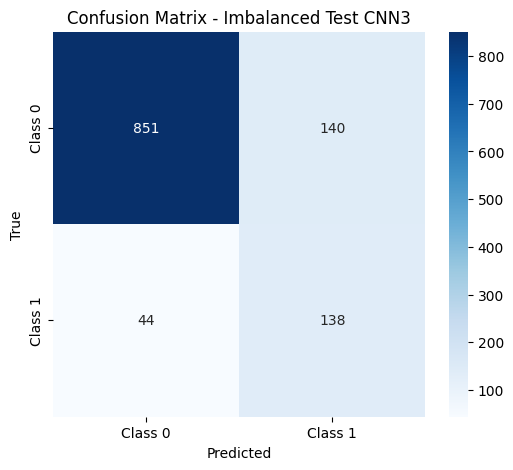

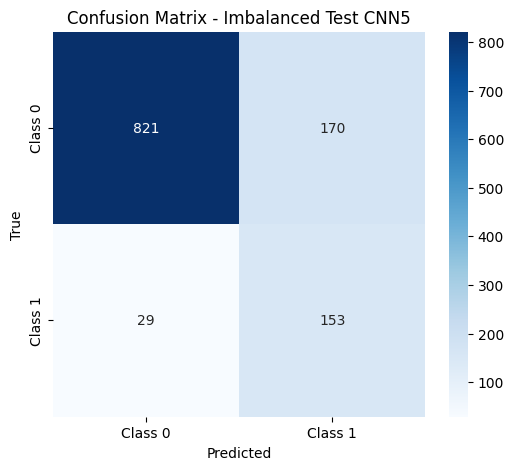

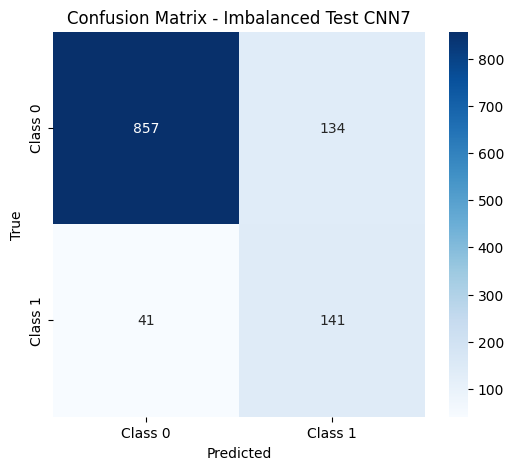

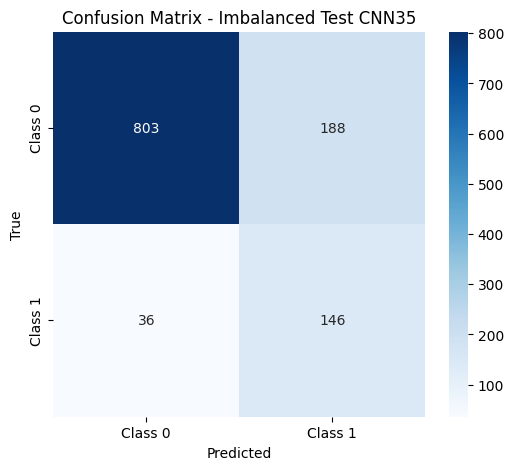

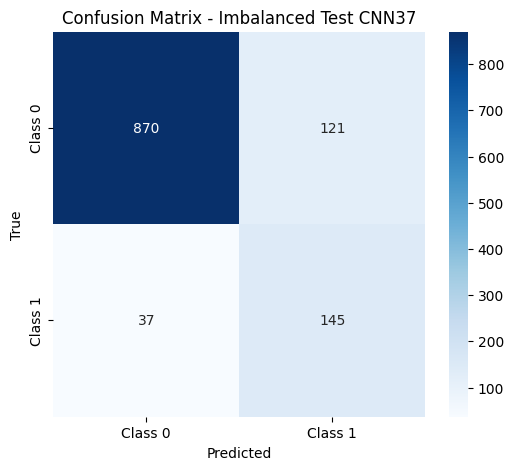

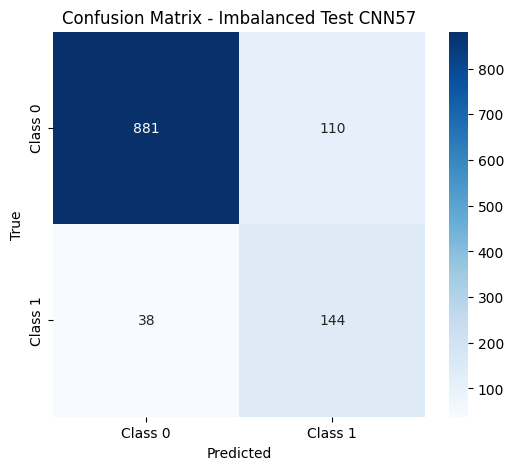

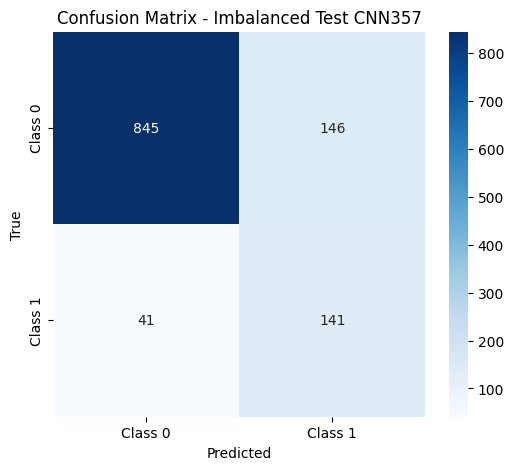

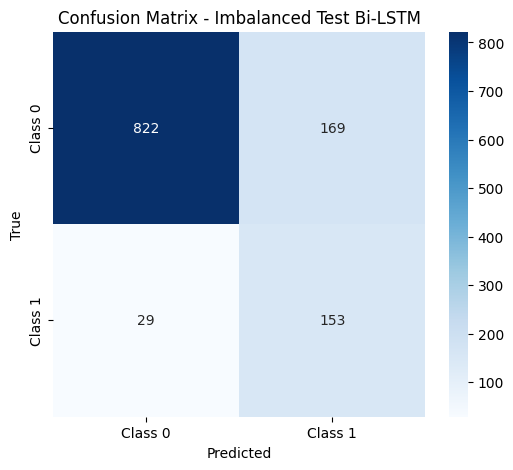

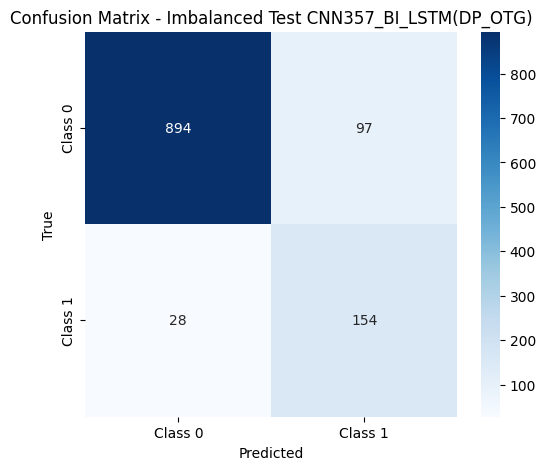


Results have been saved to Imbalanced_roc_auc_results.xlsx


In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

# Giả sử y_true là nhãn thực tế của tập kiểm tra, y_pred là nhãn dự đoán từ mô hình
y_true = ytest

# Hàm để lấy xác suất của lớp dương
def get_positive_probs(y_prob):
    return y_prob[:, 1] if len(y_prob.shape) > 1 else y_prob

# Cập nhật các xác suất của các mô hình
y_prob_CNN3 = get_positive_probs(y_prob_CNN3)
y_prob_CNN5 = get_positive_probs(y_prob_CNN5)
y_prob_CNN7 = get_positive_probs(y_prob_CNN7)
y_prob_CNN35 = get_positive_probs(y_prob_CNN35)
y_prob_CNN37 = get_positive_probs(y_prob_CNN37)
y_prob_CNN57 = get_positive_probs(y_prob_CNN57)
y_prob_CNN357 = get_positive_probs(y_prob_CNN357)
y_prob_Bi_LSTM = get_positive_probs(y_prob_Bi_LSTM)
y_prob_CNN357_BI_LSTM = get_positive_probs(y_prob_CNN357_BI_LSTM)

# Dự đoán các nhãn từ các mô hình (dự đoán theo xác suất lớp dương)
y_pred_CNN3 = (y_prob_CNN3 >= 0.5).astype(int)
y_pred_CNN5 = (y_prob_CNN5 >= 0.5).astype(int)
y_pred_CNN7 = (y_prob_CNN7 >= 0.5).astype(int)
y_pred_CNN35 = (y_prob_CNN35 >= 0.5).astype(int)
y_pred_CNN37 = (y_prob_CNN37 >= 0.5).astype(int)
y_pred_CNN57 = (y_prob_CNN57 >= 0.5).astype(int)
y_pred_CNN357 = (y_prob_CNN357 >= 0.5).astype(int)
y_pred_Bi_LSTM = (y_prob_Bi_LSTM >= 0.5).astype(int)
y_pred_CNN357_BI_LSTM = (y_prob_CNN357_BI_LSTM >= 0.5).astype(int)

# Tính AUC cho từng mô hình
fpr_CNN3, tpr_CNN3, _ = metrics.roc_curve(y_true, y_prob_CNN3)
roc_auc_CNN3 = metrics.auc(fpr_CNN3, tpr_CNN3)

fpr_CNN5, tpr_CNN5, _ = metrics.roc_curve(y_true, y_prob_CNN5)
roc_auc_CNN5 = metrics.auc(fpr_CNN5, tpr_CNN5)

fpr_CNN7, tpr_CNN7, _ = metrics.roc_curve(y_true, y_prob_CNN7)
roc_auc_CNN7 = metrics.auc(fpr_CNN7, tpr_CNN7)

fpr_CNN35, tpr_CNN35, _ = metrics.roc_curve(y_true, y_prob_CNN35)
roc_auc_CNN35 = metrics.auc(fpr_CNN35, tpr_CNN35)

fpr_CNN37, tpr_CNN37, _ = metrics.roc_curve(y_true, y_prob_CNN37)
roc_auc_CNN37 = metrics.auc(fpr_CNN37, tpr_CNN37)

fpr_CNN57, tpr_CNN57, _ = metrics.roc_curve(y_true, y_prob_CNN57)
roc_auc_CNN57 = metrics.auc(fpr_CNN57, tpr_CNN57)

fpr_CNN357, tpr_CNN357, _ = metrics.roc_curve(y_true, y_prob_CNN357)
roc_auc_CNN357 = metrics.auc(fpr_CNN357, tpr_CNN357)

fpr_Bi_LSTM, tpr_Bi_LSTM, _ = metrics.roc_curve(y_true, y_prob_Bi_LSTM)
roc_auc_Bi_LSTM = metrics.auc(fpr_Bi_LSTM, tpr_Bi_LSTM)

fpr_CNN357_BI_LSTM, tpr_CNN357_BI_LSTM, _ = metrics.roc_curve(y_true, y_prob_CNN357_BI_LSTM)
roc_auc_CNN357_BI_LSTM = metrics.auc(fpr_CNN357_BI_LSTM, tpr_CNN357_BI_LSTM)

# Hàm vẽ Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = metrics.confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - Imbalanced Test {model_name}')
    plt.show()

# Vẽ Confusion Matrix cho từng mô hình
plot_confusion_matrix(y_true, y_pred_CNN3, 'CNN3')
plot_confusion_matrix(y_true, y_pred_CNN5, 'CNN5')
plot_confusion_matrix(y_true, y_pred_CNN7, 'CNN7')
plot_confusion_matrix(y_true, y_pred_CNN35, 'CNN35')
plot_confusion_matrix(y_true, y_pred_CNN37, 'CNN37')
plot_confusion_matrix(y_true, y_pred_CNN57, 'CNN57')
plot_confusion_matrix(y_true, y_pred_CNN357, 'CNN357')
plot_confusion_matrix(y_true, y_pred_Bi_LSTM, 'Bi-LSTM')
plot_confusion_matrix(y_true, y_pred_CNN357_BI_LSTM, 'CNN357_BI_LSTM(DP_OTG)')

# Lưu kết quả vào file Excel (nếu muốn)
results = {
    'Model': ['CNN3', 'CNN5', 'CNN7', 'CNN35', 'CNN37', 'CNN57', 'CNN357', 'Bi-LSTM', 'DP_OTG'],
    'ROC AUC': [roc_auc_CNN3, roc_auc_CNN5, roc_auc_CNN7, roc_auc_CNN35, roc_auc_CNN37, roc_auc_CNN57, roc_auc_CNN357, roc_auc_Bi_LSTM, roc_auc_CNN357_BI_LSTM]
}

df_results = pd.DataFrame(results)

# Lưu kết quả vào file Excel
output_file = 'Imbalanced_roc_auc_results.xlsx'
df_results.to_excel(output_file, index=False)

print(f"\nResults have been saved to {output_file}")


In [37]:
import numpy as np
from sklearn import metrics

y_true = ytest

# Kiểm tra số chiều trước khi lấy cột thứ 2
def get_positive_probs(y_prob):
    return y_prob[:, 1] if len(y_prob.shape) > 1 else y_prob

y_prob_CNN3 = get_positive_probs(y_prob_CNN3)
y_prob_CNN5 = get_positive_probs(y_prob_CNN5)
y_prob_CNN7 = get_positive_probs(y_prob_CNN7)
y_prob_CNN35 = get_positive_probs(y_prob_CNN35)
y_prob_CNN37 = get_positive_probs(y_prob_CNN37)
y_prob_CNN57 = get_positive_probs(y_prob_CNN57)
y_prob_CNN357 = get_positive_probs(y_prob_CNN357)
y_prob_Bi_LSTM = get_positive_probs(y_prob_Bi_LSTM)
y_prob_CNN357_BI_LSTM = get_positive_probs(y_prob_CNN357_BI_LSTM)
# Tính ROC và AUC cho từng mô hình
fpr_CNN3, tpr_CNN3, _ = metrics.roc_curve(y_true, y_prob_CNN3)
roc_auc_CNN3 = metrics.auc(fpr_CNN3, tpr_CNN3)

fpr_CNN5, tpr_CNN5, _ = metrics.roc_curve(y_true, y_prob_CNN5)
roc_auc_CNN5 = metrics.auc(fpr_CNN5, tpr_CNN5)

fpr_CNN7, tpr_CNN7, _ = metrics.roc_curve(y_true, y_prob_CNN7)
roc_auc_CNN7 = metrics.auc(fpr_CNN7, tpr_CNN7)

fpr_CNN35, tpr_CNN35, _ = metrics.roc_curve(y_true, y_prob_CNN35)
roc_auc_CNN35 = metrics.auc(fpr_CNN35, tpr_CNN35)

fpr_CNN37, tpr_CNN37, _ = metrics.roc_curve(y_true, y_prob_CNN37)
roc_auc_CNN37 = metrics.auc(fpr_CNN37, tpr_CNN37)

fpr_CNN57, tpr_CNN57, _ = metrics.roc_curve(y_true, y_prob_CNN57)
roc_auc_CNN57 = metrics.auc(fpr_CNN57, tpr_CNN57)

fpr_CNN357, tpr_CNN357, _ = metrics.roc_curve(y_true, y_prob_CNN357)
roc_auc_CNN357 = metrics.auc(fpr_CNN357, tpr_CNN357)

fpr_Bi_LSTM, tpr_Bi_LSTM, _ = metrics.roc_curve(y_true, y_prob_Bi_LSTM)
roc_auc_Bi_LSTM = metrics.auc(fpr_Bi_LSTM, tpr_Bi_LSTM)

fpr_CNN357_BI_LSTM, tpr_CNN357_BI_LSTM, _ = metrics.roc_curve(y_true, y_prob_CNN357_BI_LSTM)
roc_auc_CNN357_BI_LSTM = metrics.auc(fpr_CNN357_BI_LSTM, tpr_CNN357_BI_LSTM)

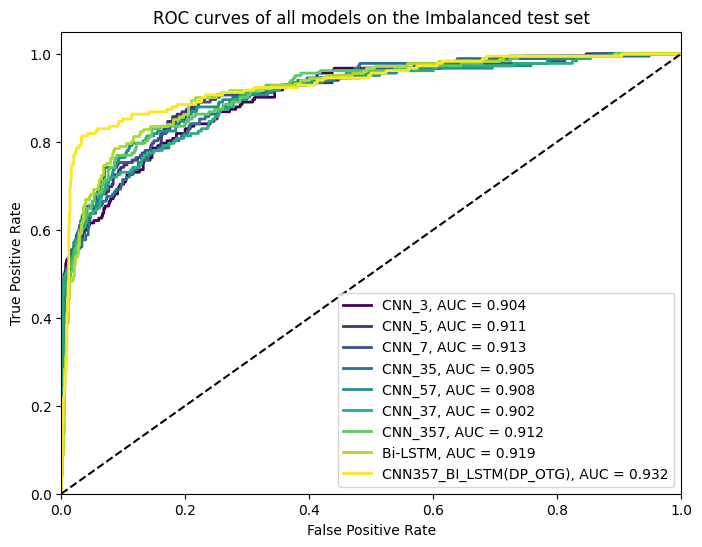

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

plt.figure(figsize=(8, 6))
colors = plt.cm.viridis(np.linspace(0, 1, 9))

for (fpr, tpr, auc_value, label, color) in zip(
    [fpr_CNN3, fpr_CNN5, fpr_CNN7,fpr_CNN35, fpr_CNN57,fpr_CNN357,fpr_CNN37, fpr_Bi_LSTM, fpr_CNN357_BI_LSTM],
    [tpr_CNN3, tpr_CNN5, tpr_CNN7,tpr_CNN35,tpr_CNN57,tpr_CNN357,tpr_CNN37, tpr_Bi_LSTM, tpr_CNN357_BI_LSTM],
    [roc_auc_CNN3, roc_auc_CNN5, roc_auc_CNN7, roc_auc_CNN35, roc_auc_CNN57, roc_auc_CNN357, roc_auc_CNN37,roc_auc_Bi_LSTM,roc_auc_CNN357_BI_LSTM ],
    ['CNN_3', 'CNN_5', 'CNN_7','CNN_35','CNN_57','CNN_37', 'CNN_357', 'Bi-LSTM','CNN357_BI_LSTM(DP_OTG)'],
    colors
):
    plt.plot(fpr, tpr, color=color, lw=2, label=f'{label}, AUC = {auc_value:.3f}')

plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves of all models on the Imbalanced test set')
plt.legend(loc="lower right")
plt.show()

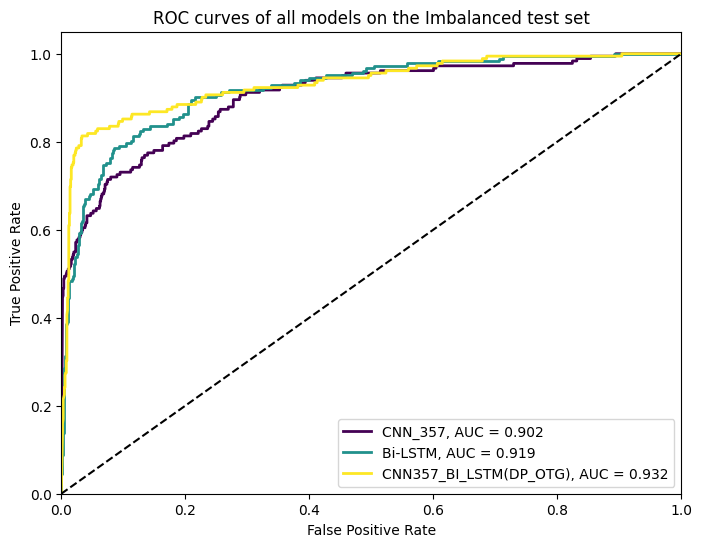

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

plt.figure(figsize=(8, 6))
colors = plt.cm.viridis(np.linspace(0, 1, 3))  # Tạo đủ 7 màu cho 7 mô hình

for (fpr, tpr, auc_value, label, color) in zip(
    [ fpr_CNN357,fpr_Bi_LSTM, fpr_CNN357_BI_LSTM],
    [ tpr_CNN357,tpr_Bi_LSTM, tpr_CNN357_BI_LSTM],
    [roc_auc_CNN357,roc_auc_Bi_LSTM,roc_auc_CNN357_BI_LSTM ],
    ['CNN_357', 'Bi-LSTM','CNN357_BI_LSTM(DP_OTG)'],
    colors
):
    plt.plot(fpr, tpr, color=color, lw=2, label=f'{label}, AUC = {auc_value:.3f}')

plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves of all models on the Imbalanced test set')
plt.legend(loc="lower right")
plt.show()